In [1]:
from sklearn import svm 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[-2, -15],
     [-10, 2],  [-1, -29],[-10, -2],[-21, -15],[-18, -5],[-12, -18], [-15, -16],[-5, -22],[-16, -28],[-45, -13],[-11, -27],
     [ 2, -34],[-19, -21],[-4, -5],  [-18, -16],[-28, -39],[-23, -18],[-7, -7],[-23, -23],   [ 9,  5],[ 2,  39],
     [ 14,  15],[ 7,  27],[ 3,  17],[ 11,  23],[ 14,  8],[ 19,  24],[ 20,  23], [ 13,  16],
    [ 13,  16],   [ 21,  2],[ 21,  15], [ 3,  24],  [ 10,  20], [ 27,  21],[ 31,  7], [ 24,  13],[ 11,  14], [ 16,  20]])

In [13]:
y = [0] * 20 + [1] * 20

In [14]:
labels = np.concatenate((np.zeros(20),np.ones(20)))

In [15]:
clf = svm.SVC(kernel="linear")
clf.fit(X,y)

SVC(kernel='linear')

In [16]:
coeff=clf.coef_[0]
w=-coeff[0]/coeff[1]
xx=np.linspace(-50,50)
b=clf.intercept_[0]/coeff[1]
yy=w*xx+b
print(w,b)

-1.3 -3.249999999999999


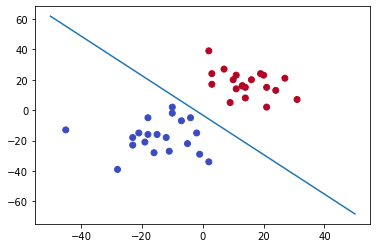

In [17]:
# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.plot(xx,yy)

In [23]:
# Get support vectors
support_vectors = clf.support_vectors_

# Get the margin
margin = 2 / np.sqrt(np.sum(clf.coef_ ** 2))
print("Support vectors:", support_vectors)
print("Margin:", margin)

Support vectors: [[-4. -5.]
 [ 9.  5.]]
Margin: 16.401219466856723


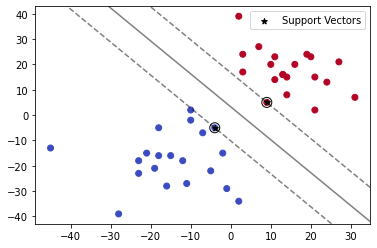

In [24]:
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='black', marker='*', label='Support Vectors')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.legend()
plt.show()